# Autoregressive Integrated Moving Average (ARIMA)

In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
# from google.colab import files

# !ls
# !rm "sales-of-shampoo-over-a-three-ye.csv"
# uploaded = files.upload()

In [2]:
series = read_csv("sales-of-shampoo-over-a-three-ye.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
series.head()

Month
1991-01-01    266.0
1991-02-01    145.9
1991-03-01    183.1
1991-04-01    119.3
1991-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

Let's perform a quick plot to understand/visualise what the data looks like.

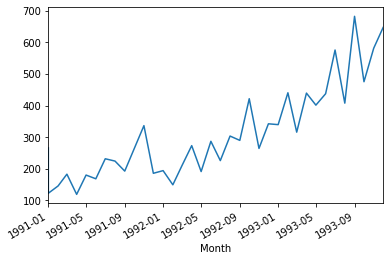

In [3]:
series.plot()
pyplot.show()

We can see a general increase in the dataset which we can refer to as a trend.  

These suggests that the time series is not stationary and will require differencing to make it stationary.  
This means we are going to try to take out the trend component: d = 1

## p, d, q (arima parameters)

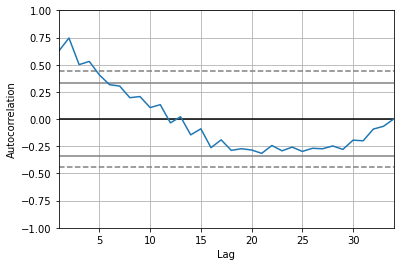

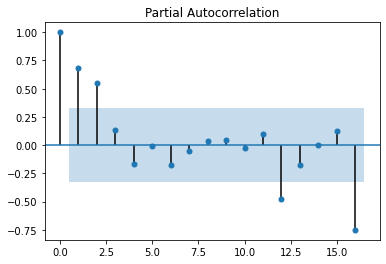

In [4]:
autocorrelation_plot(series[1:35])
pyplot.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(series)
pyplot.show()

The autocorrelation plot is saying somewhere around 5 the critical boundary is being reached.  
The value we will experiment with:  p = 5  

The partial-autocorrelation plot shows that there are 3 lags going beyond the critical range.  
The value we will experiment with: q = 3  

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 2)   Log Likelihood                -191.363
Method:                                                css-mle   S.D. of innovations             51.424
Date:                                         Thu, 31 Dec 2020   AIC                            400.726
Time:                                                 23:49:57   BIC                            414.724
Sample:                                                      1   HQIC                           405.558
                                                                                                       
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

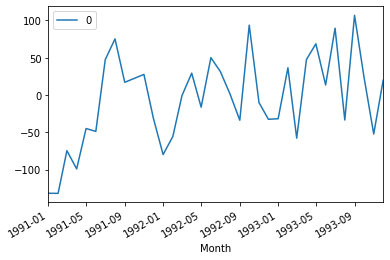

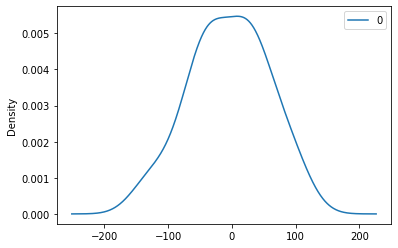

                0
count   35.000000
mean    -5.243844
std     60.783089
min   -131.706812
25%    -46.738162
50%     -0.735767
75%     34.085581
max    106.873961


In [5]:
# fit the model
# model = ARIMA(series, order=(5,1,3)) # first model still showed some trend so we try (5,2,3)
# model = ARIMA(series, order=(5,2,3)) # gave convergence warning
# model = ARIMA(series, order=(5,2,2)) # gave an error
model = ARIMA(series, order=(5,1,2))   
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Find lag
print("lag : ", model_fit.k_ar)

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## Rolling Forecast
We now try to use the model to predict future responses.  

We can use the predict() function on the ARIMAResults object to make predictions. It accepts the index of the time steps to make predictions as arguments. 

Using the forecast() function performs a one-step forecast using the model.

predicted=349.117761, expected=342.300000
predicted=306.512942, expected=339.700000
predicted=387.376445, expected=440.400000
predicted=348.154199, expected=315.900000
predicted=386.308822, expected=439.300000
predicted=356.082042, expected=401.300000
predicted=446.379536, expected=437.400000
predicted=394.737318, expected=575.500000
predicted=434.915478, expected=407.600000
predicted=507.923471, expected=682.000000
predicted=435.482749, expected=475.300000
predicted=652.743821, expected=581.300000
predicted=546.343408, expected=646.900000
Test MSE: 6958.326


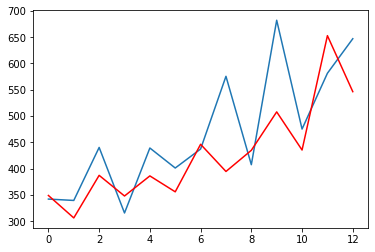

In [6]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()